# Project #1: Convert \*C to \*F

The objective is to predict the value of one variable Y based on another variable X.

Basically we are trying to predict what the equation would be between \*C and \*F Using given data.

This is called *Regression*.

## Step 0: Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices()

2022-07-06 14:47:26.111395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 14:47:26.117350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 14:47:26.117769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Step 1: Import the dataset

In [3]:
temp_df = pd.read_csv('Celsius+to+Fahrenheit.csv')

In [4]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [5]:
temp_df.tail(5)

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


## Visualize Dataset

/home/aditya/miniconda3/envs/py37_TF/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


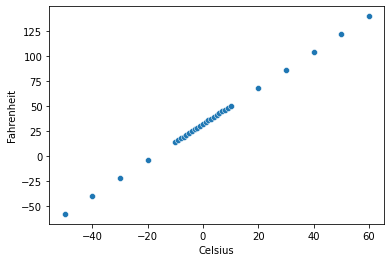

In [6]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit']);

## Create test and training datasets 

In [7]:
# from sklearn.model_selection import train_test_split
# Training the entire dataset
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [8]:
X_train.shape

(30,)

In [9]:
y_train.shape

(30,)

## Build and train the model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(1),
              metrics=['mse'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 153ms/step - loss: 1074.2209 - mse: 1074.2209
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1176.5944 - mse: 1176.5944
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 941.8542 - mse: 941.8542
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 852.4177 - mse: 852.4177
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 881.6635 - mse: 881.6635
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 799.6991 - mse: 799.6991
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 681.3997 - mse: 681.3997
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 633.4031 - mse: 633.4031
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 628.3171 - mse: 628.3171
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 584.2144 - mse: 584.2144
Epoch 11/500
1/1 [===============

## Evaluate the model

In [17]:
model_history.history.keys()

dict_keys(['loss', 'mse'])

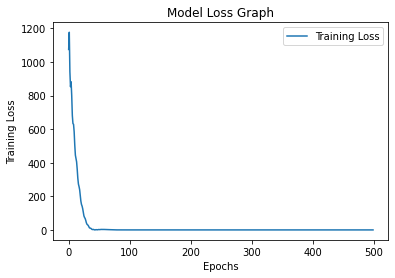

In [19]:
plt.plot(model_history.history['loss'])
plt.title('Model Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [21]:
model.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [22]:
Temp_C = 0

Temp_F = model.predict([Temp_C])
Temp_F

array([[32.]], dtype=float32)